<a href="https://colab.research.google.com/github/hoijja-S2/IPColab/blob/main/Ch04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np #이미지는 기본적으로 2차원 배열이기 때문
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


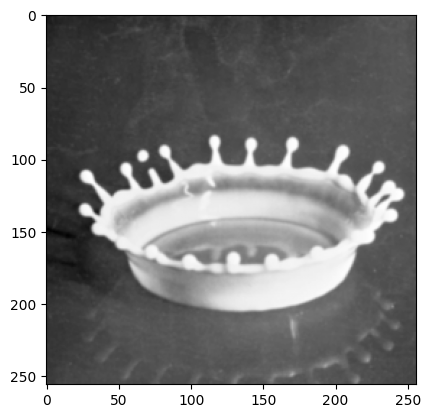

In [65]:
#img = cv2.imread('/content/gdrive/My Drive/IPColab/images/images/lena256.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IPColab/images/images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IPColab/images/images/cell-bright.bmp')
img = cv2.imread('/content/gdrive/My Drive/IPColab/images/images/milkdrop.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap = 'gray')

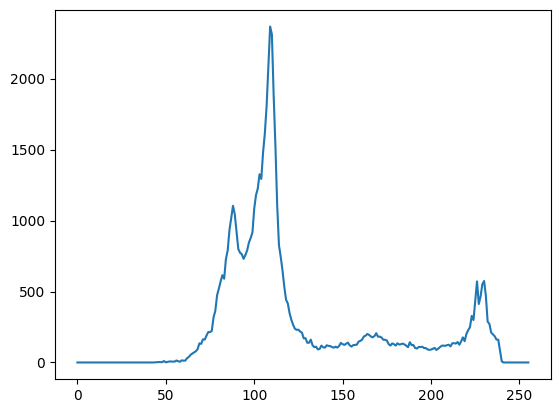

In [66]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

In [67]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

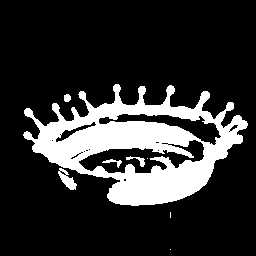

In [72]:
Threshold = 170
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h,w] > Threshold:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0

cv2_imshow(gBin)

In [73]:
T1 = 128
T2 = 0
T0 = 1

In [78]:
def threshold_update(img, bimg, h, w, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(gimg1.shape[0]):
    for w in range(gimg1.shape[1]):
      if(bimg[h, w]==0):
        sum1 += np.int32(sum1 + img[h, w])
        count1 += 1
      else:
        sum2 += np.int32(sum2 + img[h, w])
        count2 += 1
  avg1 = sum1/count1
  avg2 = sum2/count2
  T1 = (avg1+avg2)/2
  return T1

In [85]:
while True:
  T2 = threshold_update(gimg1, gBin)
  print(T2)

  if(np.abs(T1-T2) < T0):
    break
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if gimg1[h,w] > T1:
          gBin[h,w] = 0
        else:
          gBin[h,w] = 255
    cv2_imshow(gBin)

TypeError: threshold_update() missing 3 required positional arguments: 'h', 'w', and 'T1'